In [1]:
import os
import time
import sys
import scipy
import glob
import importlib
import _pickle as pkl
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

from datetime import datetime

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

import shutil
import scipy.stats as spstats

import trajectory as traj
import plotting as putil

In [2]:
util.set_sns_style(style='dark', min_fontsize=12)
pl.rcParams['svg.fonttype'] = 'none'
%matplotlib notebook

util.set_sns_style(style='dark')

In [161]:
#srcdir = '/home/julianarhee/Documents/projects/plume-tracking/data'
# rootdir='/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'
rootdir = util.get_rootdir()
print(rootdir)

srcdir = os.path.join(rootdir, 'jyr', 'plume_geometries', 'data')
fnames = os.listdir(srcdir)
fnames

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data
Save figures to:  /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/figures


['heatmaps_0.p', 'T_plume.p', 'heatmaps_45.p']

In [4]:
import _pickle as pkl

In [346]:
experiment = 'T_plume'
fpath = os.path.join(srcdir, '{}.p'.format(experiment))
print(fpath)
with open(fpath, 'rb') as f:
    dfdict = pkl.load(f)
    
figid = fpath

figdir = srcdir.replace('data', 'figures') #os.path.join(figdir, experiment)
curr_figdir = os.path.join(figdir, experiment)
if not os.path.exists(curr_figdir):
    os.makedirs(curr_figdir)
print("Save figures to: ", curr_figdir)
if not os.path.exists(curr_figdir):
    os.makedirs(curr_figdir)

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/data/T_plume.p
Save figures to:  /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/figures/T_plume


In [163]:
dfdict.keys()

dict_keys(['03042022-140837_T_plume.log', '03042022-153138_T_plume_Fly2_T1.log', '03042022-155820_T_plume_Fly2_T2.log', '03042022-180206_T_plume_Fly3.log', '03042022-183431_T_Plume_Fly4.log', '03042022-190904_T_plume_Fly5.log', '03072022-135441_T_Plume_Fly6.log', '03072022-154741T_Plume_Fly7_T1(fictrac lost tracking).log', '03072022-160439_T_Plume_Fly7_t2.log', '03072022-174233_T_Plume_Fly8.log', '03142022-162226_t_plume_Fly9_t1(lost tracking).log', '03142022-162816_T_plume_Fly9_T2.log', '03142022-190502_T_plume_Fly10(lost tracking).log'])

In [164]:
dfdict['03042022-140837_T_plume.log']['data'].columns

Index(['mfc1_stpt', 'mfc2_stpt', 'mfc3_stpt', 'led1_stpt', 'led2_stpt',
       'sig_status', 'ft_posx', 'ft_posy', 'ft_frame', 'ft_error', 'ft_roll',
       'ft_pitch', 'ft_yaw', 'ft_heading', 'instrip', 'timestamp',
       'motor_step_command', 'seconds'],
      dtype='object')

# zero trajectories

In [208]:
#dfdict['03042022-140837_T_plume.log']['data']
d_list = []
for fi, (fn, df_) in enumerate(dfdict.items()):
    if 'instrip' not in df_['data'].columns:
        print(fn)
    df_['data']['filename'] = fn
    df0 = df_['data'].copy()
    
        # convert timestamp str into datetime obj, convert to sec
    datefmt  = '%m/%d/%Y-%H:%M:%S.%f'
    df0['time'] = df0['timestamp'].apply(lambda x: \
                            time.mktime(x.timetuple()) \
                            + x.microsecond / 1E6 ).astype('float')
    df0['rel_time'] = df0['time'] - df0['time'].iloc[0]
    # convert datestr
    df0['date'] = df0['timestamp'].apply(lambda s: \
            int(s.date().strftime("%Y%m%d")))
    # convert ft_heading to make it continuous and in range (-pi, pi)
    if 'ft_heading' in df0.columns:
        p = util.unwrap_and_constrain_angles(df0['ft_heading'].values)
        df0['ft_heading'] = p #-p 
    
    df0 = butil.process_df(df0, bout_thresh=0.25)
    df_z = putil.zero_trajectory(df0)
    df_z['fly_id'] = fi
    df_z['condition'] = experiment
    df_z['experiment'] = experiment
#     d_ = pd.DataFrame({
#         'ft_posx': df_z['ft_posx'],
#         'ft_posy': df_z['ft_posy'],
#         'ft_heading': df_z['ft_heading'],
#         'instrip': df_z['instrip'],
#         'boutnum': df_z['boutnum'],
#         'filename': fn,
#         'fly_id': fi,
#         'condition': experiment,
#         'experiment': experiment
#     })
    d_list.append(df_z)
df0_zero = pd.concat(d_list, axis=0)


[bout 5]  too short outstrip, should be IN
[bout 6]  too short instrip, should be OUT
[bout 7]  too short outstrip, should be IN
[bout 9]  too short outstrip, should be IN
[bout 10]  too short instrip, should be OUT
[bout 11]  too short outstrip, should be IN
[bout 12]  too short instrip, should be OUT
[bout 14]  too short instrip, should be OUT
[bout 15]  too short outstrip, should be IN
[bout 16]  too short instrip, should be OUT
[bout 17]  too short outstrip, should be IN
[bout 18]  too short instrip, should be OUT
[bout 20]  too short instrip, should be OUT
[bout 21]  too short outstrip, should be IN
[bout 22]  too short instrip, should be OUT
[bout 23]  too short outstrip, should be IN
[bout 24]  too short instrip, should be OUT
[bout 25]  too short outstrip, should be IN
[bout 26]  too short instrip, should be OUT
[bout 27]  too short outstrip, should be IN
[bout 29]  too short outstrip, should be IN
[bout 30]  too short instrip, should be OUT
[bout 31]  too short outstrip, shoul

[bout 9]  too short outstrip, should be IN
[bout 18]  too short instrip, should be OUT
[bout 30]  too short instrip, should be OUT
[bout 38]  too short instrip, should be OUT
[bout 39]  too short outstrip, should be IN
[bout 40]  too short instrip, should be OUT
[bout 59]  too short outstrip, should be IN
[bout 60]  too short instrip, should be OUT
[bout 78]  too short instrip, should be OUT
[bout 79]  too short outstrip, should be IN
[bout 32]  too short instrip, should be OUT
[bout 3]  too short outstrip, should be IN
[bout 4]  too short instrip, should be OUT
[bout 6]  too short instrip, should be OUT
[bout 9]  too short outstrip, should be IN
[bout 16]  too short instrip, should be OUT
[bout 17]  too short outstrip, should be IN
[bout 27]  too short outstrip, should be IN
[bout 28]  too short instrip, should be OUT
[bout 60]  too short instrip, should be OUT
[bout 66]  too short instrip, should be OUT
[bout 80]  too short instrip, should be OUT
[bout 82]  too short instrip, should 

In [209]:
df0_zero.columns

Index(['mfc1_stpt', 'mfc2_stpt', 'mfc3_stpt', 'led1_stpt', 'led2_stpt',
       'sig_status', 'ft_posx', 'ft_posy', 'ft_frame', 'ft_error', 'ft_roll',
       'ft_pitch', 'ft_yaw', 'ft_heading', 'instrip', 'timestamp',
       'motor_step_command', 'seconds', 'filename', 'time', 'rel_time', 'date',
       'boutnum', 'cum_time', 'speed', 'upwind_speed', 'crosswind_speed',
       'euclid_dist', 'upwind_dist', 'crosswind_dist', 'fly_id', 'condition',
       'experiment'],
      dtype='object')

In [210]:
file_lut = dict((fi, fn) for fi, fn in enumerate(df['filename'].unique()))
len(file_lut)

13

<IPython.core.display.Javascript object>


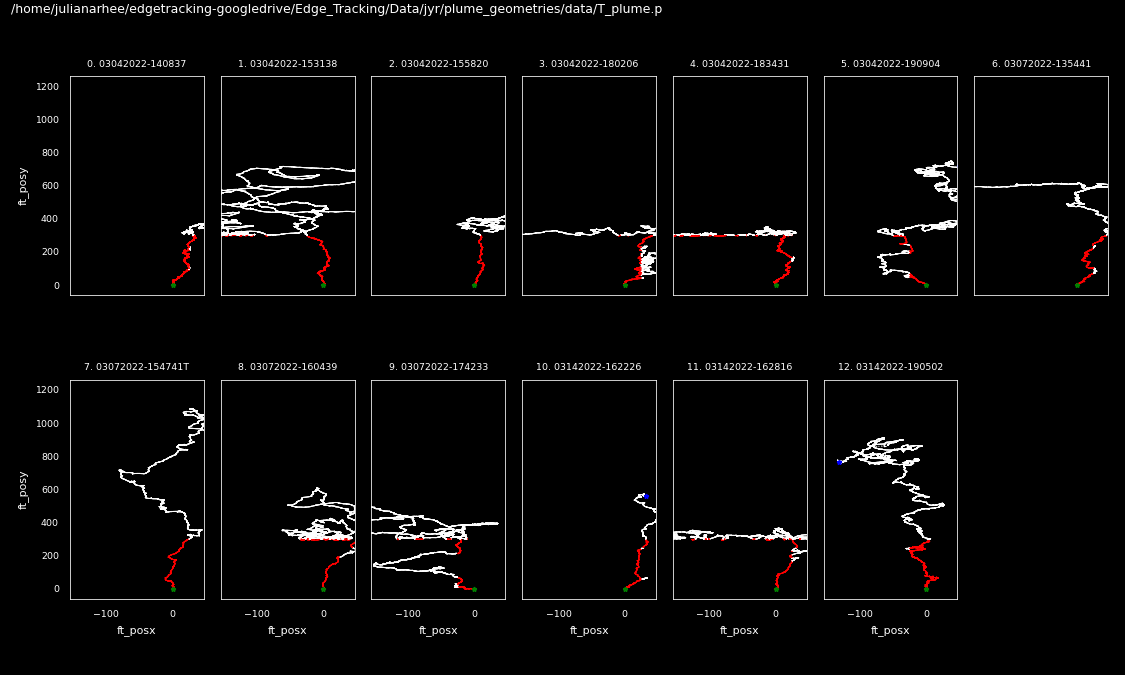

In [211]:
#putil.plot_array_of_trajectories(df, nr=3, nc=4, title='fly_id')
nr=2
nc=7
fig, axn = pl.subplots(nr, nc, figsize=(10,6), sharex=True, sharey=True)
for fi, fn in file_lut.items(): #fi, (fn, df_) in enumerate(df.groupby('filename')):
    df_ = df[df['filename']==fn].copy()
    ax=axn.flat[fi]
    butil.plot_trajectory(df_, ax =ax)
    ax.set_aspect(0.25)
    ax.legend_.remove()
    title='{}. {}'.format(fi, fn.split('_')[0])
    ax.set_title(title, fontsize=6)
for i in np.arange(fi+1, nr*nc):
    ax=axn.flat[i]
    ax.axis('off')
pl.tight_layout()

util.label_figure(fig, figid)

pl.savefig(os.path.join(curr_figdir, 'trajectories.png'))

# get ETs

In [212]:
et_ixs = [1, 4, 8, 11]
ets = [file_lut[i] for i in et_ixs]
etdf_zero = df0_zero[df0_zero['filename'].isin(ets)].copy()

In [213]:
etdf_zero.columns

Index(['mfc1_stpt', 'mfc2_stpt', 'mfc3_stpt', 'led1_stpt', 'led2_stpt',
       'sig_status', 'ft_posx', 'ft_posy', 'ft_frame', 'ft_error', 'ft_roll',
       'ft_pitch', 'ft_yaw', 'ft_heading', 'instrip', 'timestamp',
       'motor_step_command', 'seconds', 'filename', 'time', 'rel_time', 'date',
       'boutnum', 'cum_time', 'speed', 'upwind_speed', 'crosswind_speed',
       'euclid_dist', 'upwind_dist', 'crosswind_dist', 'fly_id', 'condition',
       'experiment'],
      dtype='object')

# split in odor, inbound, outbound

In [214]:
boutdir_palette = {'inodor': 'w', 'inbound': 'c', 'outbound': 'm'}
smooth_window=11
rdp_epsilon=1

In [254]:
xvar='ft_posx'
yvar='ft_posy'
for fn, df_ in etdf_zero.groupby('filename'):
    last_outbout = df_[~df_['instrip']]['boutnum'].max()
    max_boutnum = df_['boutnum'].max()
    skip_last_bout = last_outbout==max_boutnum
    df_['boutdir'] = None
    df_.loc[df_['instrip'], 'boutdir'] = 'inodor'
    for bnum, bdf in df_[~df_['instrip']].groupby('boutnum'):
        max_ix = np.argmax(bdf[yvar])
        if max_ix==0: # this bout is flipped out to negative side, do flipLR
            bdf['ft_posx'], bdf['ft_posy'] = util.fliplr_coordinates(bdf['ft_posx'].values, \
                                             bdf['ft_posy'].values)
            max_ix = np.argmax(bdf[yvar])
        min_ix = np.argmin(bdf[yvar])
        #maxdist_x = bdf.iloc[max_ix][xvar] - bdf.iloc[min_ix][xvar]
        first_ix = bdf.iloc[0].name
        last_ix = bdf.iloc[-1].name
        mid_ix = bdf.iloc[max_ix].name
        df_.loc[first_ix:mid_ix, 'boutdir'] = 'outbound'
        df_.loc[mid_ix:last_ix, 'boutdir'] = 'inbound'
        
    df_ = butil.smooth_traces(df_)
    df_ = butil.add_rdp_by_bout(df_, epsilon=rdp_epsilon, xvar=xvar, yvar=yvar)

    etdf_zero.loc[etdf_zero['filename']==fn, 'boutdir'] = df_['boutdir'].values
    etdf_zero.loc[etdf_zero['filename']==fn, 'rdp_{}'.format(xvar)] = df_['rdp_{}'.format(xvar)].values
    etdf_zero.loc[etdf_zero['filename']==fn, 'rdp_{}'.format(yvar)] = df_['rdp_{}'.format(yvar)].values

In [255]:
etdf_zero.columns

Index(['mfc1_stpt', 'mfc2_stpt', 'mfc3_stpt', 'led1_stpt', 'led2_stpt',
       'sig_status', 'ft_posx', 'ft_posy', 'ft_frame', 'ft_error', 'ft_roll',
       'ft_pitch', 'ft_yaw', 'ft_heading', 'instrip', 'timestamp',
       'motor_step_command', 'seconds', 'filename', 'time', 'rel_time', 'date',
       'boutnum', 'cum_time', 'speed', 'upwind_speed', 'crosswind_speed',
       'euclid_dist', 'upwind_dist', 'crosswind_dist', 'fly_id', 'condition',
       'experiment', 'boutdir', 'rdp_ft_posx', 'rdp_ft_posy'],
      dtype='object')

03042022-183431_T_Plume_Fly4.log


<IPython.core.display.Javascript object>


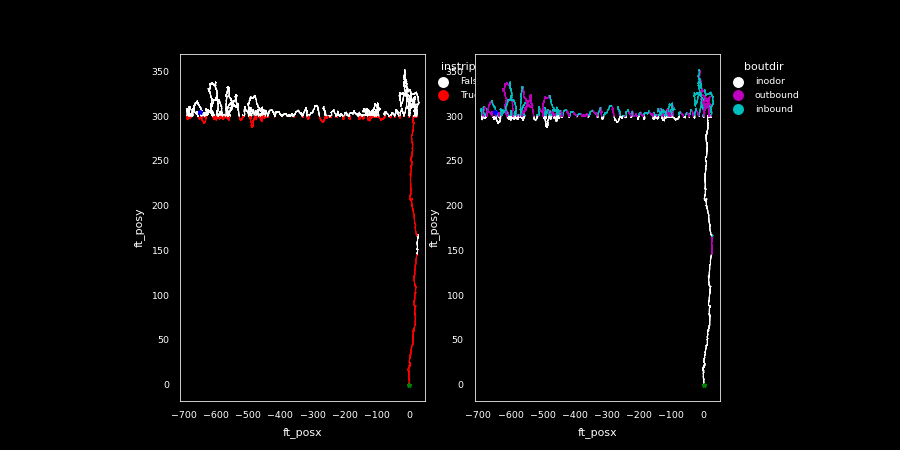

<AxesSubplot: xlabel='ft_posx', ylabel='ft_posy'>

In [256]:
fn = file_lut[4]
print(fn)
df_ = etdf_zero[etdf_zero['filename']==fn].copy()
fig, axn = pl.subplots(1, 2, figsize=(8,4))
butil.plot_trajectory(df_, ax=axn[0])
butil.plot_trajectory(df_, hue_varname='boutdir', palette=boutdir_palette, ax=axn[1])

In [264]:
y_thresh = 300 - strip_width/2
d_ = df_[df_['ft_posy']>=y_thresh].copy()
d_.head()

,mfc1_stpt,mfc2_stpt,mfc3_stpt,led1_stpt,led2_stpt,sig_status,ft_posx,ft_posy,ft_frame,ft_error,...,crosswind_speed,euclid_dist,upwind_dist,crosswind_dist,fly_id,condition,experiment,boutdir,rdp_ft_posx,rdp_ft_posy
5458,0.2,0.05,0.0,0.0,0.0,0,8.169108,275.035088,9001,4307.293574,...,-4.768736,0.126693,0.117449,0.047506,4,T_plume,T_plume,inodor,False,False
5459,0.2,0.05,0.0,0.0,0.0,0,8.051464,275.181229,9002,4236.985300,...,-0.415636,0.187610,0.146141,0.117644,4,T_plume,T_plume,inodor,False,False
5460,0.2,0.05,0.0,0.0,0.0,0,8.148863,275.436077,9004,4670.722806,...,-0.716796,0.272826,0.254847,0.097399,4,T_plume,T_plume,inodor,False,False
5461,0.2,0.05,0.0,0.0,0.0,0,8.005576,275.648128,9006,4255.162957,...,-4.302221,0.255924,0.212051,0.143287,4,T_plume,T_plume,inodor,False,False
5462,0.2,0.05,0.0,0.0,0.0,0,7.934306,275.815827,9007,4442.660227,...,-3.104903,0.182215,0.167699,0.071270,4,T_plume,T_plume,inodor,False,False


In [265]:
d_['odor_heading'] = d_['ft_heading'] - np.pi/2
p = util.unwrap_and_constrain_angles(d_['odor_heading'].values)
d_['odor_heading'] = p #-p 

<IPython.core.display.Javascript object>


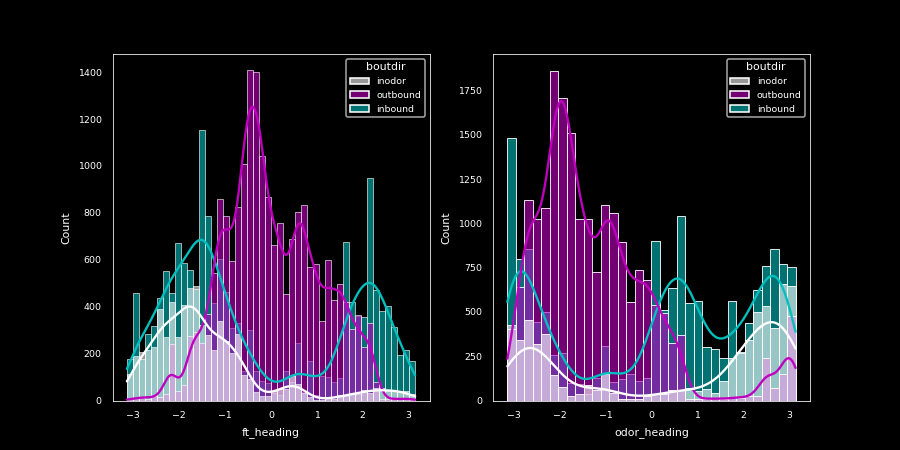

<AxesSubplot: xlabel='odor_heading', ylabel='Count'>

In [268]:
fig, axn = pl.subplots(1, 2, figsize=(8,4))
sns.histplot(data=d_, x='ft_heading', hue='boutdir', palette=boutdir_palette, ax=axn[0], alpha=0.6, 
             element='bars', kde=True) 
sns.histplot(data=d_, x='odor_heading', hue='boutdir', palette=boutdir_palette, ax=axn[1], alpha=0.6, 
             element='bars', kde=True) #fill=False)

In [331]:
hist_var = 'odor_heading'
weights_var = 'euclid_dist'
bin_method='fd'

In [341]:
curr_figdir = os.path.join(figdir, 'by-individual')
if not os.path.exists(curr_figdir):
    os.makedirs(curr_figdir)

<IPython.core.display.Javascript object>


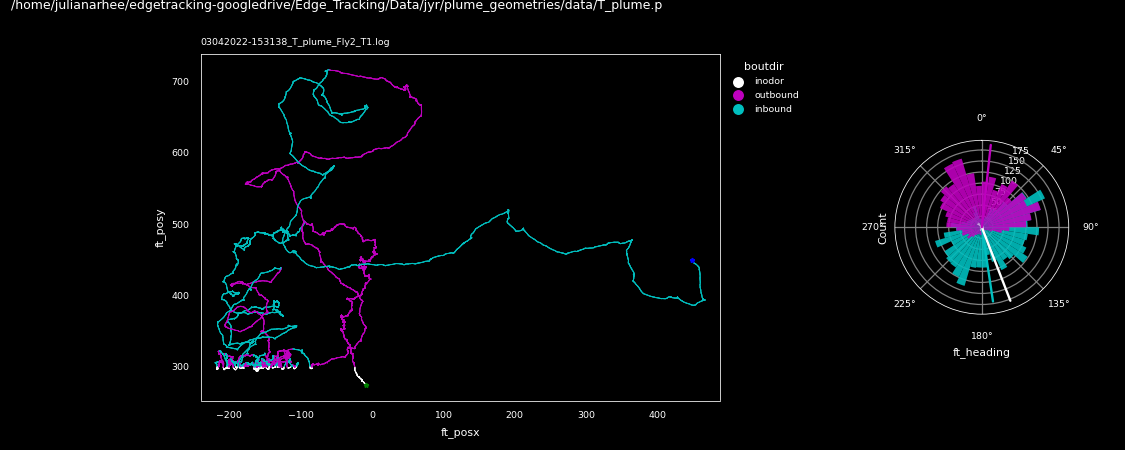

<IPython.core.display.Javascript object>


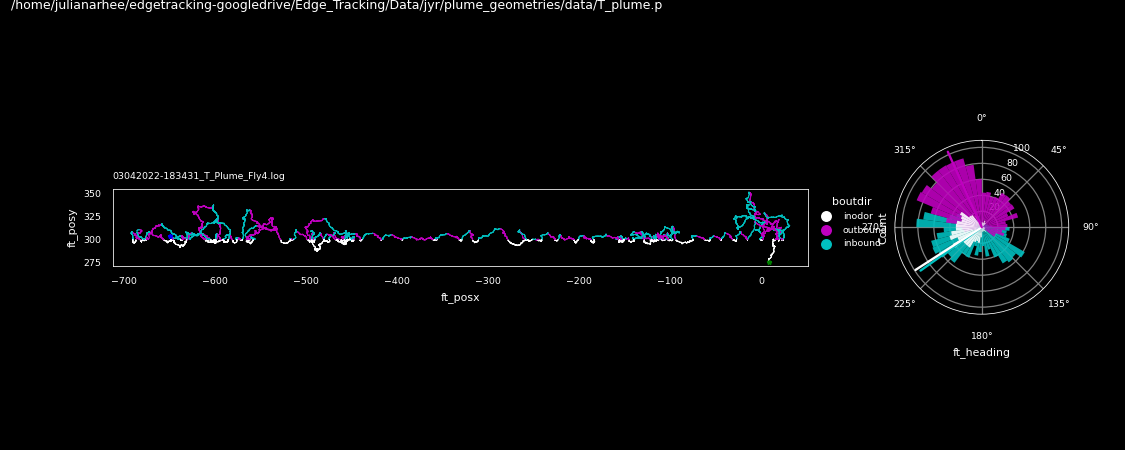

<IPython.core.display.Javascript object>


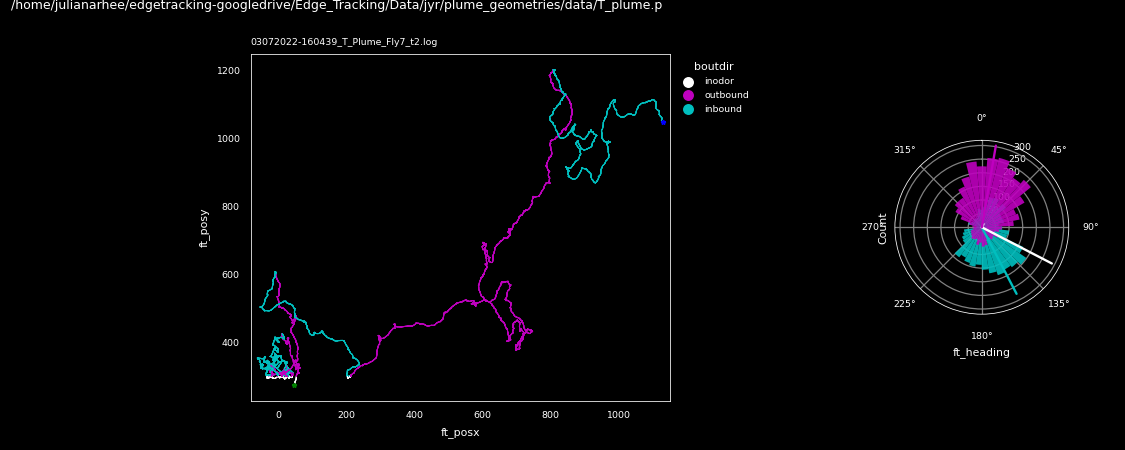

<IPython.core.display.Javascript object>


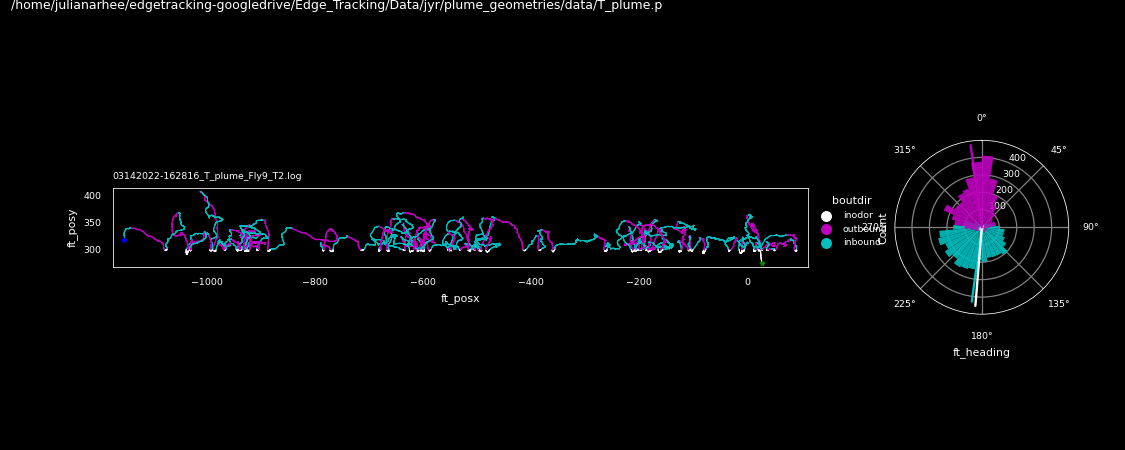

In [356]:
y_thresh = 300 - strip_width/2

for fn, df_ in etdf_zero.groupby('filename'):
    fig = pl.figure(figsize=(10,4))
    gs = mpl.gridspec.GridSpec(1,4)
    ax = fig.add_subplot(gs[0, 0:3])
    d_ = df_[df_['ft_posy']>=y_thresh].copy()
        
    butil.plot_trajectory(d_, hue_varname='boutdir', palette=boutdir_palette, ax=ax)
    ax.set_title(fn, loc='left', fontsize=6)
    ax.set_aspect(1)

    ax = fig.add_subplot(gs[0, 3], projection='polar') #pl.subplot(122, projection='polar')
    ax = sns.histplot(data=d_, bins=bin_method, x=hist_var, ax=ax, hue='boutdir', 
                     palette=boutdir_palette, alpha=0.9, common_norm=False, weights=weights_var)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.legend_.remove() #sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1))
#     for (boutnum, boutdir), bdf in d_.groupby(['boutnum', 'boutdir']):
#         weighted_avg = util.get_weighted_average(bdf, #bdf[bdf['boutdir']==boutdir], 
#                                             hist_var=hist_var, weights_var=weights_var, is_circular=True)
#         ax.plot([0, weighted_avg], [0, ax.get_ylim()[-1]], boutdir_palette[boutdir]) # theta is x
    avg_ = d_.groupby(['boutnum', 'boutdir'], as_index=False).apply(util.get_weighted_average, \
                hist_var=hist_var, weights_var=weights_var, is_circular=True).rename(columns={None: hist_var})
    for boutdir, bdf in avg_.groupby('boutdir'):
        weighted_avg = util.circular_mean(bdf[hist_var])
        ax.plot([0, weighted_avg], [0, ax.get_ylim()[-1]], boutdir_palette[boutdir]) # theta is x

    pl.subplots_adjust(left=0.1, right=0.95, wspace=0.5)
    util.label_figure(fig, figid)

    pl.savefig(os.path.join(curr_figdir, '{}.png'.format(fn)))


In [367]:
def get_euclid_distance(df, xvar='ft_posx', yvar='ft_posy'):

    return np.nansum(np.linalg.norm(df[[xvar, yvar]].diff(axis=0), axis=1))


In [377]:
b_list = []
for fn, d_ in etdf_zero.groupby('filename'):
    avg_ = d_.groupby(['boutnum', 'boutdir'], as_index=False).apply(util.get_weighted_average, \
                    hist_var=hist_var, weights_var=weights_var, is_circular=True).rename(columns={None: hist_var})

    dist_ = d_.groupby(['boutnum', 'boutdir'], as_index=False).apply(get_euclid_distance).rename(columns={None: weights_var})

    boutdf = pd.merge(avg_, dist_, on=['boutnum', 'boutdir'])
    boutdf['filename'] = fn
    b_list.append(boutdf)
boutdf = pd.concat(b_list).reset_index(drop=True)

In [378]:
boutdf

,boutnum,boutdir,ft_heading,euclid_dist,filename
0,2,inodor,-0.236927,410.405807,03042022-153138_T_plume_Fly2_T1.log
1,3,inbound,-2.782021,909.562797,03042022-153138_T_plume_Fly2_T1.log
2,3,outbound,-0.457868,680.602036,03042022-153138_T_plume_Fly2_T1.log
3,4,inodor,-2.065610,9.583071,03042022-153138_T_plume_Fly2_T1.log
4,5,inbound,-2.169855,32.009309,03042022-153138_T_plume_Fly2_T1.log
...,...,...,...,...,...
523,139,inbound,-2.959791,102.997596,03142022-162816_T_plume_Fly9_T2.log
524,139,outbound,-0.384331,114.992933,03142022-162816_T_plume_Fly9_T2.log
525,140,inodor,-2.151763,4.950166,03142022-162816_T_plume_Fly9_T2.log
526,141,inbound,-2.653202,33.983796,03142022-162816_T_plume_Fly9_T2.log


<IPython.core.display.Javascript object>


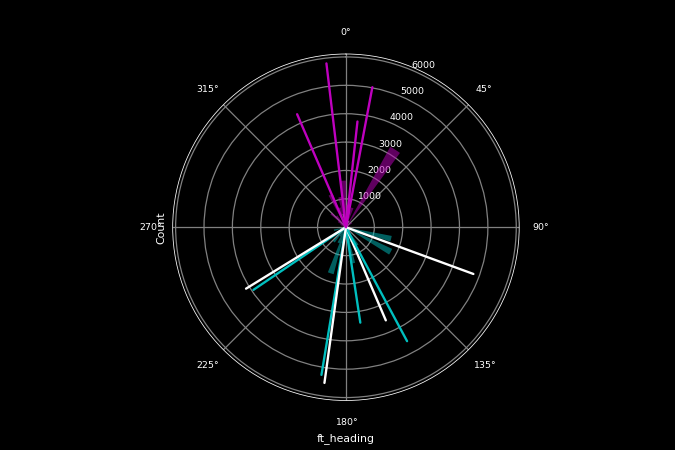

In [386]:
hist_var='ft_heading'
weights_var = 'euclid_dist'
fig, ax  = pl.subplots(subplot_kw=dict(polar=True))

sns.histplot(data=boutdf, bins=50, x=hist_var, ax=ax, hue='boutdir', 
             palette=boutdir_palette, alpha=0.5, common_norm=False, weights=weights_var)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.legend_.remove() 
for fi, (fn, df_) in enumerate(boutdf.groupby('filename')):
#sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1))
#     for boutdir, bdf in d_.groupby('boutdir'):
#         weighted_avg = util.get_weighted_average(bdf[bdf['boutdir']==boutdir], 
#                                             hist_var=hist_var, weights_var=weights_var, is_circular=True)
#         ax.plot([0, weighted_avg], [0, ax.get_ylim()[-1]], boutdir_palette[boutdir]) # theta is x
    for boutdir, bdf in df_.groupby('boutdir'):
        weighted_avg = util.circular_mean(bdf[hist_var])
        ax.plot([0, weighted_avg], [0, ax.get_ylim()[-1]], boutdir_palette[boutdir]) # theta is x

        

In [357]:
etdf_zero['filename'].nunique()

4

<IPython.core.display.Javascript object>


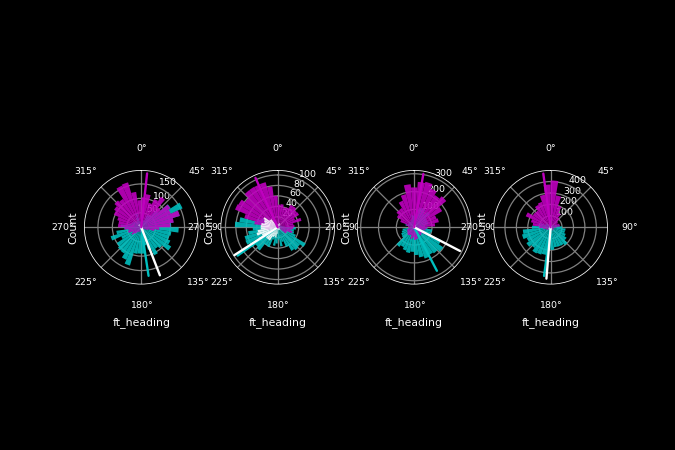

In [359]:
hist_var='ft_heading'
weights_var = 'euclid_dist'
fig, axn  = pl.subplots(1, 4, subplot_kw=dict(polar=True))
for fi, (fn, df_) in enumerate(etdf_zero.groupby('filename')):
    d_ = df_[df_['ft_posy']>=y_thresh].copy()

    avg_ = d_.groupby(['boutnum', 'boutdir'], as_index=False).apply(util.get_weighted_average, \
                hist_var=hist_var, weights_var=weights_var, is_circular=True).rename(columns={None: hist_var})
    
    ax = axn.flat[fi]
    sns.histplot(data=d_, bins=bin_method, x=hist_var, ax=ax, hue='boutdir', 
                 palette=boutdir_palette, alpha=0.9, common_norm=False, weights=weights_var)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.legend_.remove() #sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1))
#     for boutdir, bdf in d_.groupby('boutdir'):
#         weighted_avg = util.get_weighted_average(bdf[bdf['boutdir']==boutdir], 
#                                             hist_var=hist_var, weights_var=weights_var, is_circular=True)
#         ax.plot([0, weighted_avg], [0, ax.get_ylim()[-1]], boutdir_palette[boutdir]) # theta is x
    for boutdir, bdf in avg_.groupby('boutdir'):
        weighted_avg = util.circular_mean(bdf[hist_var])
        ax.plot([0, weighted_avg], [0, ax.get_ylim()[-1]], boutdir_palette[boutdir]) # theta is x

        

# heatmaps

In [11]:
import scipy as sp

In [12]:
max_nframes = df.groupby('filename')['ft_posy'].count().max()

d_list=[]
for fi, (fn, df_) in enumerate(df.groupby('filename')):
    #up_ = traj.upsample_bout_trajectories(df_, npoints=max_nframes)
    x = df_['ft_posx'].values
    y = df_['ft_posy'].values
    t = np.arange(len(df_))
    t_common = np.linspace(t[0], t[-1], max_nframes)
    fx = sp.interpolate.interp1d(t, x)
    fy = sp.interpolate.interp1d(t, y)

    interpx =fx(t_common)
    interpy = fy(t_common)
    d_ = pd.DataFrame({
        'ft_posx': interpx,
        'ft_posy': interpy,
        'filename': fn,
        'fly_id': fi
    })    
    d_list.append(d_)


In [13]:
updf = pd.concat(d_list, axis=0)
updf.groupby('filename').count()

,ft_posx,ft_posy,fly_id
filename,,,
03042022-140837_T_plume.log,115876,115876,115876
03042022-153138_T_plume_Fly2_T1.log,115876,115876,115876
03042022-155820_T_plume_Fly2_T2.log,115876,115876,115876
03042022-180206_T_plume_Fly3.log,115876,115876,115876
03042022-183431_T_Plume_Fly4.log,115876,115876,115876
03042022-190904_T_plume_Fly5.log,115876,115876,115876
03072022-135441_T_Plume_Fly6.log,115876,115876,115876
03072022-154741T_Plume_Fly7_T1(fictrac lost tracking).log,115876,115876,115876
03072022-160439_T_Plume_Fly7_t2.log,115876,115876,115876


<IPython.core.display.Javascript object>


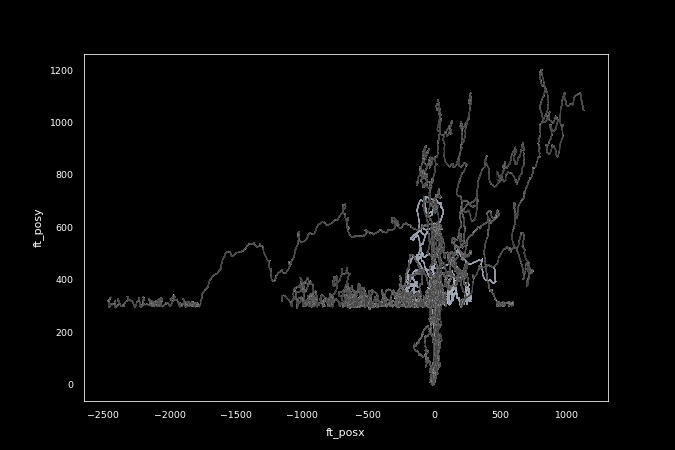

In [14]:
fig, ax= pl.subplots()
for fn, df_ in df.groupby('filename'):
    sns.scatterplot(data=df_, x='ft_posx', y='ft_posy', s=0.3, color='w', ax=ax,
                   hue='fly_id', palette='bone', legend=0)

<IPython.core.display.Javascript object>


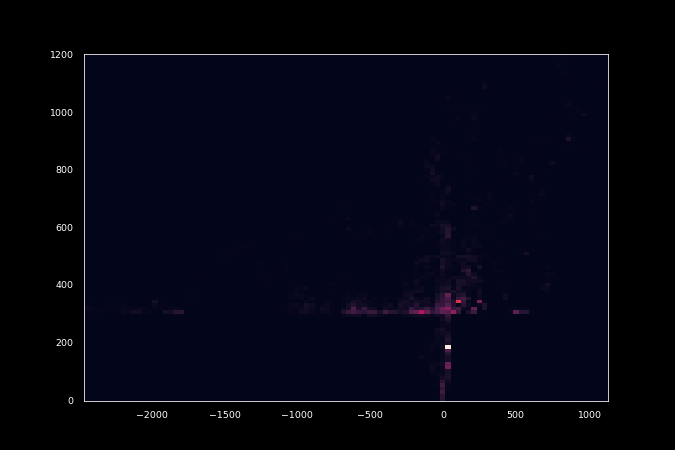

In [15]:
fig, ax = pl.subplots()
h, xe, ye, img = ax.hist2d(df['ft_posx'], df['ft_posy'], bins=100)

In [16]:
df.shape

(548349, 4)

In [17]:
d_list = []
for i, (xi, yi) in enumerate(zip(xe[0:-1], ye[0:-1])):
    startix, endix = xi, xe[i+1]
    curr_n_x = df[(df['ft_posx']>=startix) & (df['ft_posx']<endix)]['filename'].nunique()
    startix, endix = yi, ye[i+1]
    curr_n_y = df[(df['ft_posy']>=startix) & (df['ft_posy']<endix)]['filename'].nunique()
    
    d_ = pd.DataFrame({
        'edge': ['x', 'y'],
        'edge_value': [xi, yi],
        'n_flies': [curr_n_x, curr_n_y],
        'index': [i, i]
    }, index=[i, i])
    
    d_list.append(d_)
cnts = pd.concat(d_list).reset_index(drop=True)
    

In [21]:
cnts.head()

,edge,edge_value,n_flies,index
0,x,-2463.419578,1,0
1,y,-1.084950,13,0
2,x,-2427.481683,1,1
3,y,10.941865,13,1
4,x,-2391.543789,1,2


<IPython.core.display.Javascript object>


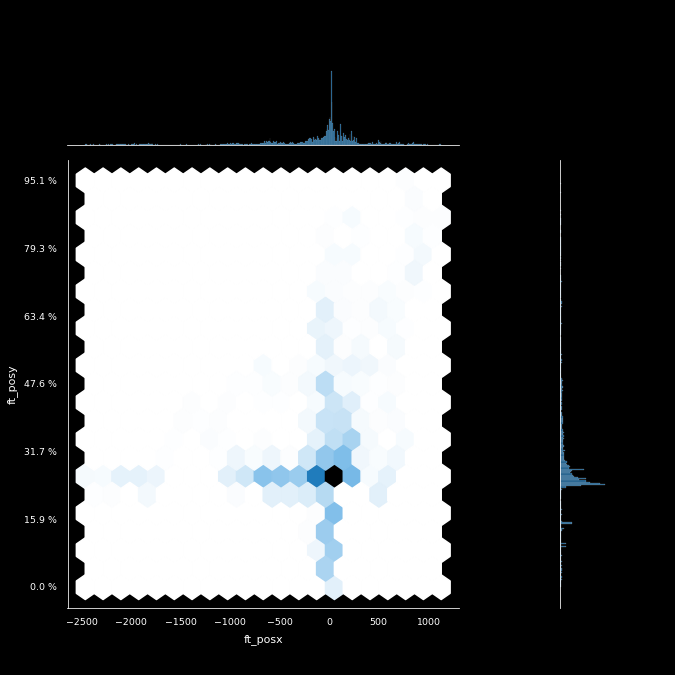

/tmp/ipykernel_930869/4234369947.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  kdeplot.fig.axes[-1].set_yticklabels([f'{t / cbar_max * 100:.1f} %' for t in cbar_ticks])


In [20]:
kdeplot = sns.jointplot(data=df, x="ft_posx", y="ft_posy", kind="hex",
              joint_kws=dict(gridsize=20))
             #marginal_kws=dict(bins=1000, fill=False))
# make new ax object for the cbar
# cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
# pl.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
# # make new ax object for the cbar
# cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
# pl.colorbar(cax=cbar_ax)

pl.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
pos_joint_ax = kdeplot.ax_joint.get_position()
pos_marg_x_ax = kdeplot.ax_marg_x.get_position()
kdeplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width,
                               pos_joint_ax.height])
kdeplot.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])

# get the current colorbar ticks
cbar_ticks = kdeplot.fig.axes[-1].get_yticks()
# get the maximum value of the colorbar
_, cbar_max = kdeplot.fig.axes[-1].get_ylim()
# change the labels (not the ticks themselves) to a percentage
kdeplot.fig.axes[-1].set_yticklabels([f'{t / cbar_max * 100:.1f} %' for t in cbar_ticks])

pl.show()